<a href="https://colab.research.google.com/github/sofisofi01/Machine-learning/blob/main/Laba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Импорт нужных библиотек

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Seaborn

In [ ]:
sns.set()
%config InlineBackend.figure_format = 'retina'

###Загрузка датасета

In [14]:
df = pd.read_csv("psd_coffee.csv")

###Базовая информация из датасета

In [15]:
print("Количество строк и столбцов:", df.shape)

Количество строк и столбцов: (6016, 21)


In [16]:
print("Начало датасета:")
print(df.head(), "\n")
print("Конец датасета:")
print(df.tail(), "\n")

Начало датасета:
   Country  Year  Arabica Production  Bean Exports  Bean Imports  \
0  Albania  1960                   0             0             0   
1  Albania  1961                   0             0             0   
2  Albania  1962                   0             0             0   
3  Albania  1963                   0             0             0   
4  Albania  1964                   0             0             0   

   Beginning Stocks  Domestic Consumption  Ending Stocks  Exports  Imports  \
0                 0                     0              0        0        0   
1                 0                     0              0        0        0   
2                 0                     0              0        0        0   
3                 0                     0              0        0        0   
4                 0                     0              0        0        0   

   ...  Production  Roast & Ground Exports  Roast & Ground Imports  \
0  ...           0                 

In [17]:
print("Типы колонок:")
print(df.dtypes, "\n")
print("Список колонок:")
print(df.columns, "\n")

Типы колонок:
Country                   object
Year                       int64
Arabica Production         int64
Bean Exports               int64
Bean Imports               int64
Beginning Stocks           int64
Domestic Consumption       int64
Ending Stocks              int64
Exports                    int64
Imports                    int64
Other Production           int64
Production                 int64
Roast & Ground Exports     int64
Roast & Ground Imports     int64
Robusta Production         int64
Rst,Ground Dom. Consum     int64
Soluble Dom. Cons.         int64
Soluble Exports            int64
Soluble Imports            int64
Total Distribution         int64
Total Supply               int64
dtype: object 

Список колонок:
Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground I

In [18]:
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 6016 non-null   object
 1   Year                    6016 non-null   int64 
 2   Arabica Production      6016 non-null   int64 
 3   Bean Exports            6016 non-null   int64 
 4   Bean Imports            6016 non-null   int64 
 5   Beginning Stocks        6016 non-null   int64 
 6   Domestic Consumption    6016 non-null   int64 
 7   Ending Stocks           6016 non-null   int64 
 8   Exports                 6016 non-null   int64 
 9   Imports                 6016 non-null   int64 
 10  Other Production        6016 non-null   int64 
 11  Production              6016 non-null   int64 
 12  Roast & Ground Exports  6016 non-null   int64 
 13  Roast & Ground Imports  6016 non-null   int64 
 14  Robusta Production      6016 non-null   int64 
 15  Rst,

In [19]:
print(df.describe())

              Year  Arabica Production  Bean Exports  Bean Imports  \
count  6016.000000         6016.000000   6016.000000   6016.000000   
mean   1991.500000          744.343251    814.576130    372.732547   
std      18.474489         3349.259676   2897.359439   3052.833589   
min    1960.000000            0.000000      0.000000      0.000000   
25%    1975.750000            0.000000      0.000000      0.000000   
50%    1991.500000            0.000000      4.000000      0.000000   
75%    2007.250000          200.000000    325.000000      0.000000   
max    2023.000000        49700.000000  41689.000000  47000.000000   

       Beginning Stocks  Domestic Consumption  Ending Stocks       Exports  \
count       6016.000000           6016.000000    6016.000000   6016.000000   
mean         457.242686            673.035239     449.392287    895.636968   
std         3116.051164           3309.043485    3039.644305   3166.527239   
min            0.000000              0.000000       0.000

In [20]:
print(df.describe(exclude=['object'] ))

              Year  Arabica Production  Bean Exports  Bean Imports  \
count  6016.000000         6016.000000   6016.000000   6016.000000   
mean   1991.500000          744.343251    814.576130    372.732547   
std      18.474489         3349.259676   2897.359439   3052.833589   
min    1960.000000            0.000000      0.000000      0.000000   
25%    1975.750000            0.000000      0.000000      0.000000   
50%    1991.500000            0.000000      4.000000      0.000000   
75%    2007.250000          200.000000    325.000000      0.000000   
max    2023.000000        49700.000000  41689.000000  47000.000000   

       Beginning Stocks  Domestic Consumption  Ending Stocks       Exports  \
count       6016.000000           6016.000000    6016.000000   6016.000000   
mean         457.242686            673.035239     449.392287    895.636968   
std         3116.051164           3309.043485    3039.644305   3166.527239   
min            0.000000              0.000000       0.000

In [22]:
print(df.describe(include=['object','bool'] ))

        Country
count      6016
unique       94
top     Albania
freq         64


In [23]:
df['Country'].value_counts()

Albania              64
Nigeria              64
Rwanda               64
Russia               64
Philippines          64
                     ..
European Union       64
Ethiopia             64
Equatorial Guinea    64
El Salvador          64
Zimbabwe             64
Name: Country, Length: 94, dtype: int64

###Индексация датафрейма

In [62]:
df1 = df.groupby('Country')['Total Distribution','Production','Domestic Consumption'].sum().reset_index()
df1.head()
df1.loc[1:10,'Country']

<ipython-input-62-9143c654de56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby('Country')['Total Distribution','Production','Domestic Consumption'].sum().reset_index()


1                    Algeria
2                     Angola
3                  Argentina
4                    Armenia
5                  Australia
6                      Benin
7                    Bolivia
8     Bosnia and Herzegovina
9                     Brazil
10                   Burundi
Name: Country, dtype: object

In [66]:
df1.iloc[1:10,1:4]

,Total Distribution,Production,Domestic Consumption
1,45890,0,45890
2,134379,55827,2963
3,16814,0,16814
4,2630,0,2630
5,35290,0,35290
6,913,869,33
7,11157,7362,2763
8,6335,0,6335
9,3520234,2221150,811491


In [67]:
df1.loc[1]

Country                 Algeria
Total Distribution        45890
Production                    0
Domestic Consumption      45890
Name: 1, dtype: object

###Нормальное распределение по столбцу Bean exports

In [26]:
df['Bean Exports'].value_counts(normalize=True)

0       0.479388
1       0.007480
10      0.006815
2       0.006815
5       0.006150
          ...   
2083    0.000166
2005    0.000166
1939    0.000166
2277    0.000166
126     0.000166
Name: Bean Exports, Length: 1409, dtype: float64

###Сортировка датасета по Bean Export

In [29]:
df.sort_values(by=['Bean Exports','Domestic Consumption'], ascending=False).head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
636,Brazil,2020,49700,41689,0,2373,22280,4390,45675,72,...,69900,32,72,20200,21350,930,3954,0,72345,72345
639,Brazil,2023,44900,39500,0,4620,22560,4585,43850,75,...,66300,50,75,21400,21600,960,4300,0,70995,70995
634,Brazil,2018,49700,37379,0,3115,23200,5056,41426,67,...,66500,24,67,16800,22020,1180,4023,0,69682,69682
635,Brazil,2019,42000,36190,0,5056,22994,2373,40256,67,...,60500,26,67,18500,22065,929,4040,0,65623,65623
637,Brazil,2021,36400,35576,0,4390,22340,540,39685,75,...,58100,54,75,21700,21400,940,4055,0,62565,62565


In [30]:
df['Domestic Consumption'].mean()

673.0352393617021

###Процентное соотношение стран по экспорту зерна

In [34]:
df['Bean Exports'].value_counts(normalize=True) * 100


0       47.938830
1        0.748005
10       0.681516
2        0.681516
5        0.615027
          ...    
2083     0.016622
2005     0.016622
1939     0.016622
2277     0.016622
126      0.016622
Name: Bean Exports, Length: 1409, dtype: float64

In [37]:
df.groupby(['Country'])[['Bean Exports', 'Domestic Consumption']].agg([np.max, np.min, np.mean])

Bean Exports                  Domestic Consumption      \
                       max min         mean                  max min   
Country                                                                
Albania                  0   0     0.000000                  105   0   
Algeria                  0   0     0.000000                 2340   0   
Angola                4135   4   838.765625                  293  10   
Argentina                0   0     0.000000                 1040   0   
Armenia                  0   0     0.000000                  250   0   
...                    ...  ..          ...                  ...  ..   
Vietnam              27269  20  8377.390625                 3200   3   
Yemen                   64   0    14.609375                  170   0   
Yemen (Sanaa)           80   0    24.750000                   10   0   
Zambia                 118   0    18.156250                    6   0   
Zimbabwe               231   0    61.703125                   10   0   

                           
                     mean  
Country                    
Albania         25.937500  
Algeria        717.031250  
Angola          46.296875  
Argentina      262.718750  
Armenia         41.093750  
...                   ...  
Vietnam        719.562500  
Yemen           35.562500  
Yemen (Sanaa)    4.843750  
Zambia           2.828125  
Zimbabwe         5.218750  

[94 rows x 6 columns]

###Сводные таблицы

In [42]:
pd.crosstab(df['Bean Imports'], df['Domestic Consumption'],  normalize=True)

Domestic Consumption,0,1,2,3,4,5,6,7,8,9,...,42092,42965,43125,43275,43675,43870,44095,44462,45250,49070
Bean Imports,,,,,,,,,,,,,,,,,,,,,
0,0.341257,0.045878,0.01363,0.007812,0.006316,0.019448,0.013132,0.004156,0.006815,0.005984,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45140,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000166,0.000000,0.0,0.0,0.0
45890,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000166,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
46150,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000166,0.0,0.0,0.0


In [43]:
(df.pivot_table(['Bean Imports', 'Bean Exports'], ['Country'], aggfunc='mean').head(5)).sort_values(by=['Bean Imports', 'Bean Exports'], ascending=[False,False])

,Bean Exports,Bean Imports
Country,,
Algeria,0.000000,706.640625
Argentina,0.000000,170.000000
Armenia,0.000000,41.093750
Albania,0.000000,25.937500
Angola,838.765625,0.000000


###Визуализация поисков

In [48]:
df2 = df.groupby('Year')['Domestic Consumption'].sum().reset_index()
print(df2.head(), "\n")

   Year  Domestic Consumption
0  1960                 16428
1  1961                 21068
2  1962                 14773
3  1963                 17769
4  1964                 16743 



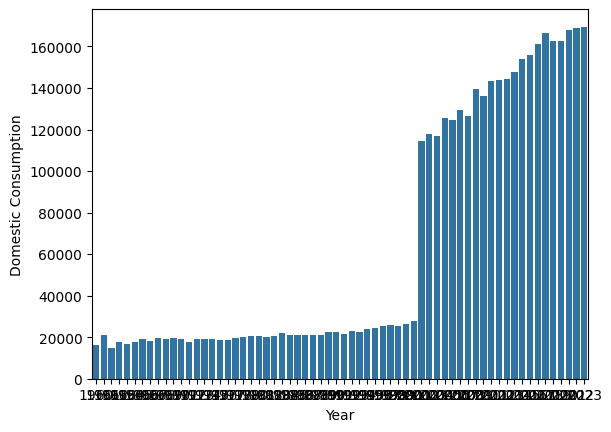

In [54]:
sns.barplot(x="Year", y="Domestic Consumption", data=df2)

<Axes: xlabel='Country', ylabel='Domestic Consumption'>

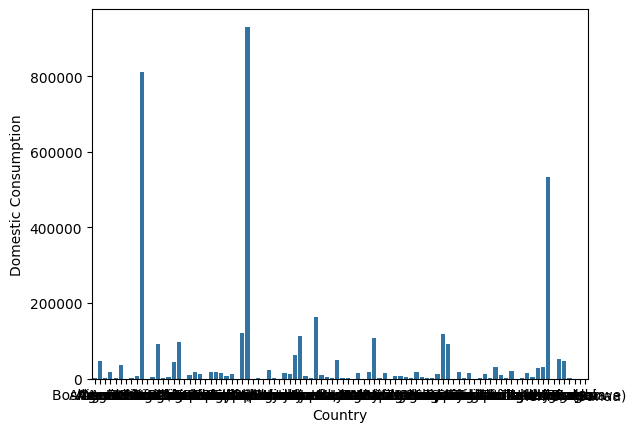

In [64]:
sns.barplot(x="Country", y="Domestic Consumption", data=df1)